In [1]:
from MiePy import *
import PyMieScatt as pm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = np.array([(np.random.rand()/2 + 1) + np.random.rand()/10*1j])
radius = np.random.rand()*2400 + 50
sigma = np.random.rand()/2 + 1.1
Vtot = np.random.rand()*3950 + 50
wavelength = 532.
angle = np.arange(180)
anglerad = angle*np.pi/180
mu = np.cos(anglerad)

In [3]:
S11, PPF = PhaseFunctions(m,wavelength,radius,angle)

S11m = np.array([])
PPFm = np.array([])

for i in range(180):
    
    S_11, S_12, S_13, S_14 = pm.MatrixElements(m, wavelength, 2*radius, mu[i])
    
    S11m = np.append(S11m, S_11)
    PPFm = np.append(PPFm, -S_12/S_11)
    
    

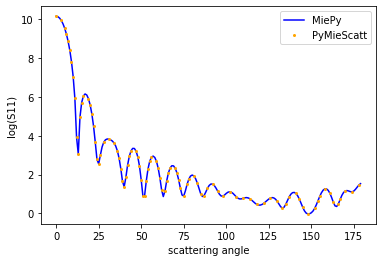

In [4]:
%matplotlib inline
plt.figure()
plt.plot(angle, np.log(S11), label='MiePy', color='blue')
plt.plot(angle, np.log(S11m), 'o', markevery=0.02, ms=2 , label = 'PyMieScatt', color='orange')
plt.xlabel('scattering angle')
plt.ylabel('log(S11)')
plt.legend()
plt.savefig('logs11_11.svg')

Plot the same thing but with additional relative error axis

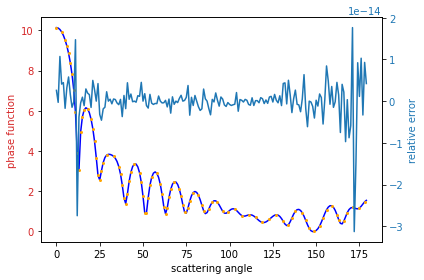

In [24]:
relerror = (S11[:,0]-S11m)/S11m
angle = np.arange(180)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scattering angle')
ax1.set_ylabel('phase function', color=color)
ax1.plot(angle, np.log(S11), label='MiePy', color='blue')
ax1.plot(angle, np.log(S11m), 'o', markevery=0.02, ms=2 , label = 'PyMieScatt', color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('relative error', color=color)  # we already handled the x-label with ax1
ax2.plot(angle, relerror, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

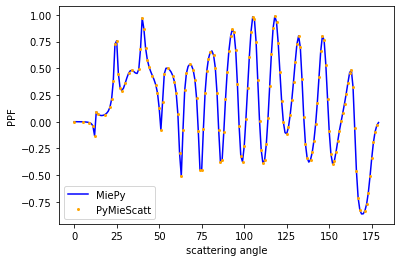

In [5]:
%matplotlib inline
plt.figure()
plt.plot(angle, PPF, label='MiePy', color='blue')
plt.plot(angle, PPFm, 'o', markevery=0.02 ,ms=2, label = 'PyMieScatt', color='orange')
plt.xlabel('scattering angle')
plt.ylabel('PPF')
plt.legend()
plt.savefig('ppf_11.svg')

plot with second y axis to plot relative error

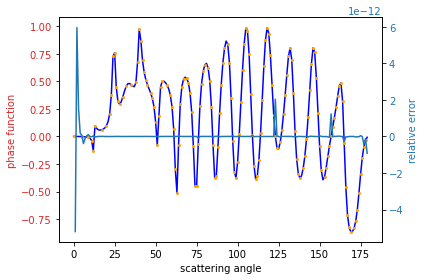

In [25]:
relerror = (PPF[1:,0]-PPFm[1:])/PPFm[1:]
angle = np.arange(180)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scattering angle')
ax1.set_ylabel('phase function', color=color)
ax1.plot(angle, PPF, label='MiePy', color='blue')
ax1.plot(angle, PPFm, 'o', markevery=0.02 ,ms=2, label = 'PyMieScatt', color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('relative error', color=color)  # we already handled the x-label with ax1
ax2.plot(angle[1:], relerror, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
np.shape(S11)

(180, 1)

In [7]:
np.shape(S11m)

(180,)

In [8]:
(S11[:,0] - S11m)/S11m

array([ 2.57932637e-15, -2.93403176e-16,  1.07097299e-14,  4.08497400e-15,
        4.43135912e-15, -1.72515199e-15,  3.20389435e-15,  5.79388027e-15,
        1.63701853e-15, -1.47539916e-15, -2.00711109e-16,  1.47322693e-14,
       -2.74868959e-14, -3.82468612e-15, -3.98887094e-16,  9.48200221e-16,
       -1.08501817e-15,  2.92204785e-15,  1.92838890e-15,  1.55700913e-15,
       -1.50633852e-15,  4.96963007e-15,  2.73822634e-15,  0.00000000e+00,
        4.20410548e-15, -3.18838034e-15, -4.57805210e-15, -1.86172491e-15,
       -1.45251053e-15,  2.25041047e-15,  0.00000000e+00,  4.66388872e-16,
       -6.43919819e-16,  5.12844697e-16,  3.77117761e-16, -4.42212481e-16,
       -8.51741850e-16,  4.13463914e-16, -3.71049248e-15,  1.35547897e-15,
       -1.80190419e-15,  4.40638963e-15,  4.45175252e-16,  1.69907561e-15,
       -1.42604330e-16,  0.00000000e+00, -2.51233368e-16,  1.30144787e-15,
        1.16061923e-15,  4.50293656e-15,  0.00000000e+00,  1.78538592e-15,
       -1.06913987e-15, -

In [12]:
a = np.mean((S11[:,0] - S11m)/S11m)
b = np.std((S11[:,0] - S11m)/S11m)
print(a, ' +- ', b)

4.049888534267844e-16  +-  1.8236193290952116e-15


In [13]:
a = np.mean((PPF[:,0] - PPFm)/(PPFm+1e-90))
b = np.std((PPF[:,0] - PPFm)/(PPFm+1e-90))
print(a, ' +- ', b)

-4.7037482126135886e-14  +-  4.3634510058122827e-13


In [14]:
angle = np.arange(180)
anglerad = angle*np.pi/180
mu = np.cos(anglerad)
wavelength = 532.

meanarrays11 = np.array([])
stdarrays11 = np.array([])
meanarrayppf = np.array([])
stdarrayppf = np.array([])

for j in range(1000):
    
    m = np.array([(np.random.rand()/2 + 1) + np.random.rand()/10*1j])
    radius = np.random.rand()*2400 + 50
    sigma = np.random.rand()/2 + 1.1
    Vtot = np.random.rand()*3950 + 50
    
    S11, PPF = PhaseFunctions(m,wavelength,radius,angle)

    S11m = np.array([])
    PPFm = np.array([])

    for i in range(180):

        S_11, S_12, S_13, S_14 = pm.MatrixElements(m, wavelength, 2*radius, mu[i])

        S11m = np.append(S11m, S_11)
        PPFm = np.append(PPFm, -S_12/S_11)
        
    means11 = np.mean((S11[:,0] - S11m)/S11m)
    stds11 = np.std((S11[:,0] - S11m)/S11m)
    
    meanppf = np.mean((PPF[:,0] - PPFm)/(PPFm+1e-90))
    stdppf = np.std((PPF[:,0] - PPFm)/(PPFm+1e-90))
    
    meanarrays11 = np.append(meanarrays11, means11)
    meanarrayppf = np.append(meanarrayppf, meanppf)
    
    stdarrays11 = np.append(stdarrays11, stds11)
    stdarrayppf = np.append(stdarrayppf, stdppf)
    

In [33]:
a = np.mean(meanarrays11)
b = np.mean(stdarrays11)

print(a, ' +- ', b)

a = np.mean(meanarrayppf)
b = np.mean(stdarrayppf)

print(a, ' +- ', b)

1.1532237708373948e-16  +-  5.6797422484422055e-15
6.489063306873863e+70  +-  5.227388169089099e+72


In [34]:
meanarrayppf

array([ 1.06220716e+72, -1.08751766e+72,  1.19202275e-14,  1.40188977e-13,
        5.08287080e-15, -7.29406696e+71,  2.77464781e+72,  1.84058398e-15,
        2.57317292e+72, -1.15627518e-14,  3.25106076e-14,  9.97303464e-16,
       -5.93278523e-15,  1.45137289e+72,  4.86423790e-14,  1.35256527e+72,
       -9.08235969e-15,  8.42494289e+71,  7.94229408e-13,  1.08633386e+72,
        3.33918459e-14,  1.32485932e+72, -1.24370619e-13,  9.31474797e-15,
        1.19494113e+72, -1.22480057e-13,  8.33340460e-14, -2.53362696e-15,
        1.88273593e-14, -1.37561497e+72,  8.90007864e+71, -2.33657626e-12,
       -9.32416642e-14,  3.39727711e-15, -4.64151214e-13,  8.06363900e+71,
        9.53448057e+71, -8.02514969e+71, -3.39645892e-14, -4.59291715e-15,
        3.53138087e-14, -6.45913668e-14, -7.81548625e+71, -7.74437732e+71,
        2.03111012e+72, -4.57357438e-14, -2.76562815e-12, -5.04697715e+71,
       -9.09635660e-14, -1.24532353e+72,  3.04640647e-11, -1.10729639e+72,
        2.45152674e-14,  